In [65]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

from skimage.metrics import structural_similarity as ssim

In [13]:
# Load the image
image = cv2.imread('/content/geometric_distorted_img.jpeg')

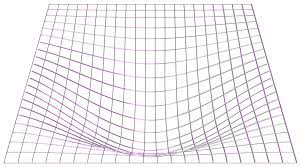

In [17]:
cv2_imshow(image)

In [14]:
def bl_resize(original_img, new_h, new_w):
	#get dimensions of original image
	old_h, old_w, c = original_img.shape
	#create an array of the desired shape.
	#We will fill-in the values later.
	resized = np.zeros((new_h, new_w, c))
	#Calculate horizontal and vertical scaling factor
	w_scale_factor = (old_w ) / (new_w ) if new_h != 0 else 0
	h_scale_factor = (old_h ) / (new_h ) if new_w != 0 else 0
	for i in range(new_h):
		for j in range(new_w):
			#map the coordinates back to the original image
			x = i * h_scale_factor
			y = j * w_scale_factor
			#calculate the coordinate values for 4 surrounding pixels.
			x_floor = math.floor(x)
			x_ceil = min( old_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(old_w - 1, math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):
				q = original_img[int(x), int(y), :]
			elif (x_ceil == x_floor):
				q1 = original_img[int(x), int(y_floor), :]
				q2 = original_img[int(x), int(y_ceil), :]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				q1 = original_img[int(x_floor), int(y), :]
				q2 = original_img[int(x_ceil), int(y), :]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor, y_floor, :]
				v2 = original_img[x_ceil, y_floor, :]
				v3 = original_img[x_floor, y_ceil, :]
				v4 = original_img[x_ceil, y_ceil, :]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j,:] = q
	return resized.astype(np.uint8)

In [16]:
h, w, c = image.shape

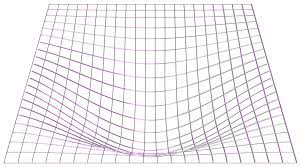

In [83]:
cv2_imshow(image)

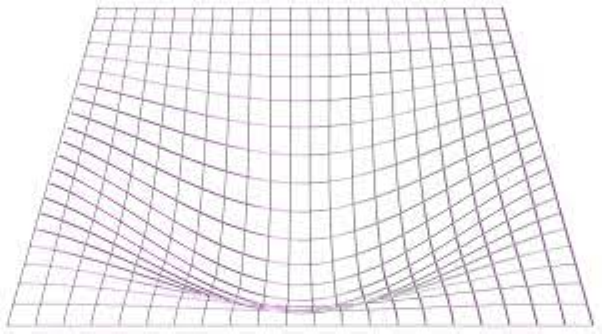

In [22]:
new_img = bl_resize(image, int(h*2), int(w*2))
cv2_imshow(new_img)

In [39]:
# import cv2
# import numpy as np

# def undistort_image_max(image_path, camera_matrix, dist_coeffs, new_camera_matrix=None):
#     # Load the distorted image
#     src = cv2.imread(image_path)

#     # If no new camera matrix is provided, use the original camera matrix
#     if new_camera_matrix is None:
#         new_camera_matrix = camera_matrix

#     h, w = src.shape[:2]
#     map1, map2 = cv2.initUndistortRectifyMap(camera_matrix, dist_coeffs, None, new_camera_matrix, (w, h), cv2.CV_32FC1)

#     dst = cv2.remap(src, map1, map2, interpolation=cv2.INTER_NEAREST)

#     return dst

In [59]:
def undistort_image(image_path, camera_matrix, dist_coeffs, new_camera_matrix=None):
    src = cv2.imread(image_path)

    if new_camera_matrix is None:
        new_camera_matrix = camera_matrix

    dst = cv2.undistort(src, camera_matrix, dist_coeffs, None, new_camera_matrix)

    return dst

In [60]:
# Example usage:
# image_path = '/content/geometric_distorted_img.jpeg'
image_path = '/content/geometric_distorted_img1.jpg'
img = cv2.imread(image_path)

camera_matrix = np.array([[800, 0, 320],
                          [0, 800, 240],
                          [0, 0, 1]], dtype=np.float32)

dist_coeffs = np.array([-0.2, 0.1, 0, 0], dtype=np.float32)


undistorted_image = undistort_image(image_path, camera_matrix, dist_coeffs)

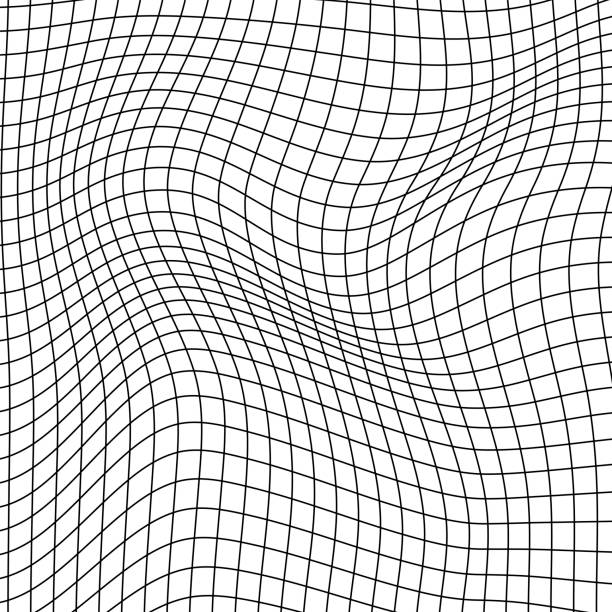

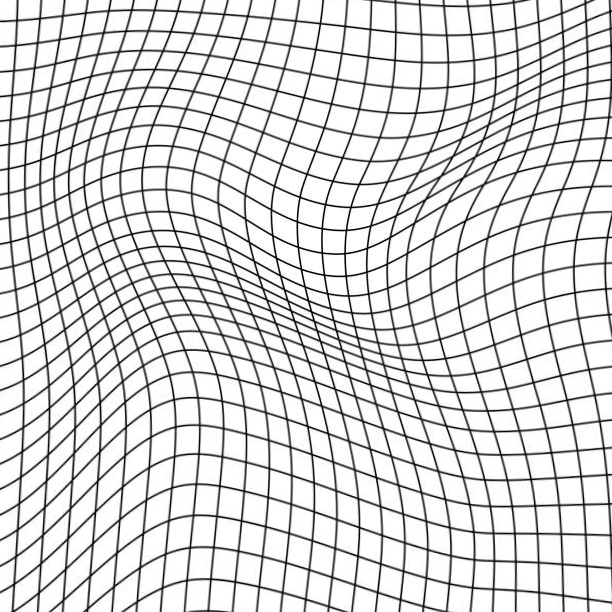

In [61]:
cv2_imshow(img)
print()
cv2_imshow(undistorted_image)

In [62]:
# image_path = '/content/geometric_distorted_img.jpeg'
image_path = '/content/images.jpeg'
img1 = cv2.imread(image_path)

camera_matrix = np.array([[800, 0, 320],
                          [0, 800, 240],
                          [0, 0, 1]], dtype=np.float32)

dist_coeffs = np.array([-0.2, 0.1, 0, 0], dtype=np.float32)


undistorted_image1 = undistort_image(image_path, camera_matrix, dist_coeffs)

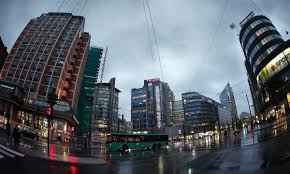

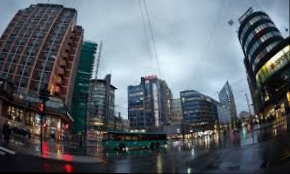

In [63]:
cv2_imshow(img1)
print()
cv2_imshow(undistorted_image1)

In [71]:
def calculate_ssim(image_1, image_2):

    # Convert the images to grayscale
    gray1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

    # Compute SSIM between the two images
    score, diff = ssim(gray1, gray2, full=True)

    # Normalize the difference image for visualization
    diff = (diff * 255).astype("uint8")

    return score, diff

SSIM: 0.3554866457391846


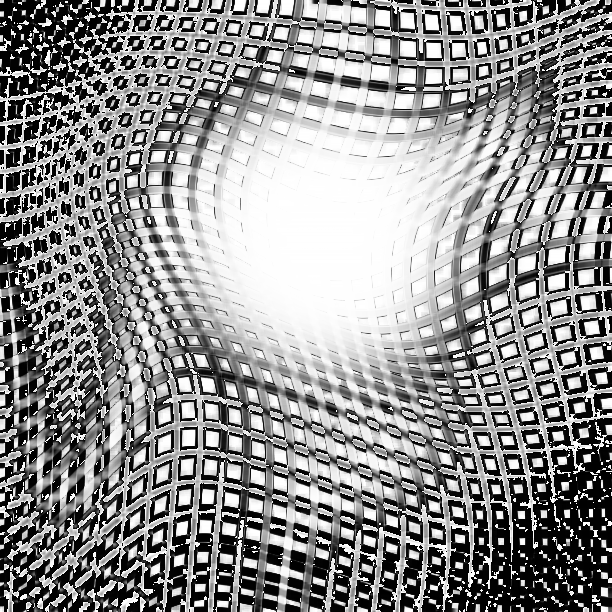

In [73]:
# ssim
ssim_score, diff_image = calculate_ssim(img, undistorted_image)

print(f"SSIM: {ssim_score}")
cv2_imshow(diff_image)

SSIM: 0.41750107134950454


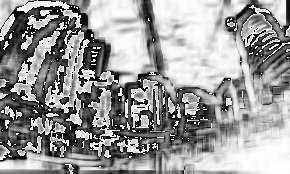

In [74]:
# ssim
ssim_score, diff_image = calculate_ssim(img1, undistorted_image1)

print(f"SSIM: {ssim_score}")
cv2_imshow(diff_image)

In [76]:
def calculate_mse(image_1, image_2):
    gray1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

    mse = np.mean((gray1 - gray2) ** 2)
    return mse

In [79]:
# mse
mse_score = calculate_mse(img, undistorted_image)

print(f"MSE: {mse_score}")

MSE: 49.83553334187705


In [80]:
# mse
mse_score1 = calculate_mse(img1, undistorted_image1)

print(f"MSE: {mse_score1}")

MSE: 71.34629409433215
